In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding,Dropout
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


数据调用直接使用申的数据

In [2]:
# 数据调用直接使用申的数据
data1 = np.genfromtxt('./data/oneweek1_0.csv', delimiter=',')
data = data1[1:, 1:]

batch_size = 1

# 4天的数据，12是步长，8是输入特征数
x_train = np.reshape(data[0:48, 0:8], (4, 12, 8))
y_train = np.reshape(data[0:48, -1], (4, 12))

In [3]:
x_train.shape

(4, 12, 8)

In [4]:
y_train.shape

(4, 12)

In [5]:
x_test = np.reshape(data[48:60, 0:8], (1, 12, 8))
y_test = data[48:60, -1]

In [6]:
# Build Model
model = Sequential()
model.add(LSTM(50,
               activation='tanh',
               input_shape=(12, 8),
               batch_size=batch_size,
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               return_sequences=False,
               stateful=True))
# model.add(LSTM(50,
#     unit_forget_bias=True
# ))
model.add(Dense(12))
model.compile(loss='mse', optimizer='rmsprop')

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=300,
          verbose=1,
          shuffle=False)
model.reset_states()

Epoch 1/300
4/4 [==============================] - 3s - loss: 1669.5368     
Epoch 2/300
4/4 [==============================] - 0s - loss: 1636.0480     
Epoch 3/300
4/4 [==============================] - 0s - loss: 1591.6170     
Epoch 4/300
4/4 [==============================] - 0s - loss: 1551.7298     
Epoch 5/300
4/4 [==============================] - 0s - loss: 1516.4327     
Epoch 6/300
4/4 [==============================] - 0s - loss: 1483.0097     
Epoch 7/300
4/4 [==============================] - 0s - loss: 1449.8457     
Epoch 8/300
4/4 [==============================] - 0s - loss: 1422.0523     
Epoch 9/300
4/4 [==============================] - 0s - loss: 1399.7429     
Epoch 10/300
4/4 [==============================] - 0s - loss: 1381.1242     
Epoch 11/300
4/4 [==============================] - 0s - loss: 1364.6170     
Epoch 12/300
4/4 [==============================] - 0s - loss: 1349.3485     
Epoch 13/300
4/4 [==============================] - 0s - loss: 1334.6967 

Predicting
(4, 12)
Plotting Results


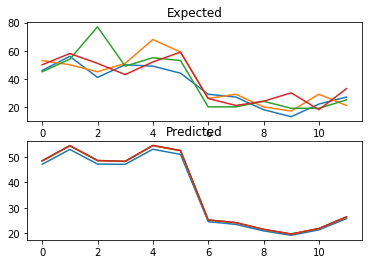

In [8]:
print('Predicting')
predicted_output = model.predict(x_train, batch_size=batch_size)
print(predicted_output.shape)


print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(np.transpose(y_train))
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(np.transpose(predicted_output))
plt.title('Predicted')
plt.show()